In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import wbdata
%matplotlib inline

countries = ['ES', 'FR', 'DE', 'GB', 'IT']

indicators = {'SP.POP.TOTL':'Population', 
              'NY.GDP.PCAP.PP.CD':'GDP per capita',
              'NY.GNP.PCAP.PP.CD':'GNI per capita'}

df = wbdata.get_dataframe(indicators=indicators, country=countries)
df.head()

Population  GDP per capita  GNI per capita
country date                                            
Germany 2019         NaN             NaN             NaN
        2018  82927922.0    53074.540118         54560.0
        2017  82657002.0    52055.309954         53390.0
        2016  82348669.0    49516.082693         50740.0
        2015  81686611.0    47683.788596         48770.0

In [13]:
df.reset_index(inplace=True)
df['date'] = df['date'].astype(int)
df.head()

,country,date,Population,GDP per capita,GNI per capita
0,Germany,2019,NaN,NaN,NaN
1,Germany,2018,82927922.0,53074.540118,54560.0
2,Germany,2017,82657002.0,52055.309954,53390.0
3,Germany,2016,82348669.0,49516.082693,50740.0
4,Germany,2015,81686611.0,47683.788596,48770.0


In [14]:
df.index

RangeIndex(start=0, stop=300, step=1)

In [15]:
df.set_index(['country', 'date'], inplace=True)
df.head()

Population  GDP per capita  GNI per capita
country date                                            
Germany 2019         NaN             NaN             NaN
        2018  82927922.0    53074.540118         54560.0
        2017  82657002.0    52055.309954         53390.0
        2016  82348669.0    49516.082693         50740.0
        2015  81686611.0    47683.788596         48770.0

In [21]:
# df.index.summary()

In [8]:
df.index.names

FrozenList(['country', 'date'])

In [9]:
df.index.levels

FrozenList([['France', 'Germany', 'Italy', 'Spain', 'United Kingdom'], [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]])

In [19]:
df.loc['Germany', 2000]

Population        8.221151e+07
GDP per capita    2.720279e+04
GNI per capita    2.705000e+04
Name: (Germany, 2000), dtype: float64

In [20]:
df_germany = df.loc['Germany']
df_germany.head()

,Population,GDP per capita,GNI per capita
date,,,
2019,NaN,NaN,NaN
2018,82927922.0,53074.540118,54560.0
2017,82657002.0,52055.309954,53390.0
2016,82348669.0,49516.082693,50740.0
2015,81686611.0,47683.788596,48770.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111bbea58>],
      dtype=object)

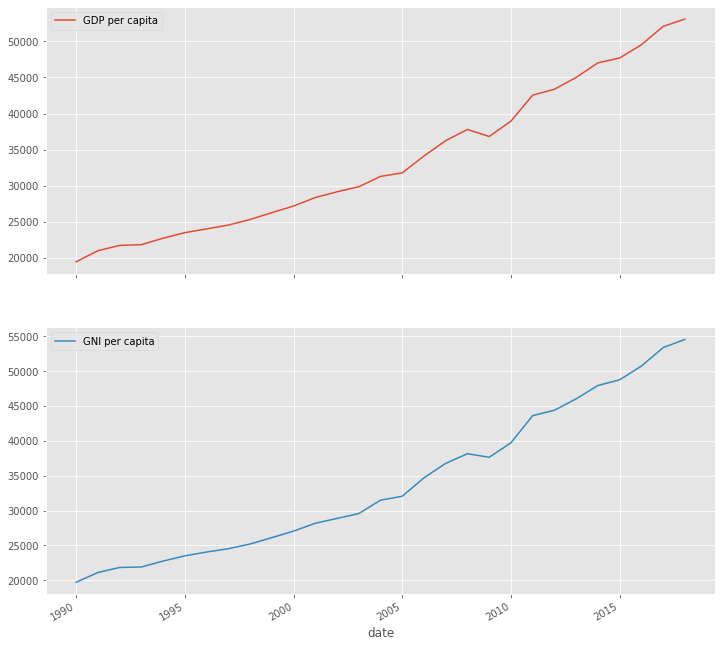

In [27]:
df_germany[['GDP per capita', 'GNI per capita']].plot(figsize=(12, 12), subplots=True, layout=(2, 1))

In [28]:
df_pivot = df.reset_index()
df_pivot = df_pivot.pivot(index='date', columns='country', values='Population')
df_pivot.head()

country,France,Germany,Italy,Spain,United Kingdom
date,,,,,
1960,46621669.0,72814900.0,50199700.0,30455000.0,52400000.0
1961,47240543.0,73377632.0,50536350.0,30739250.0,52800000.0
1962,47904877.0,74025784.0,50879450.0,31023366.0,53250000.0
1963,48582611.0,74714353.0,51252000.0,31296651.0,53650000.0
1964,49230595.0,75318337.0,51675350.0,31609195.0,54000000.0


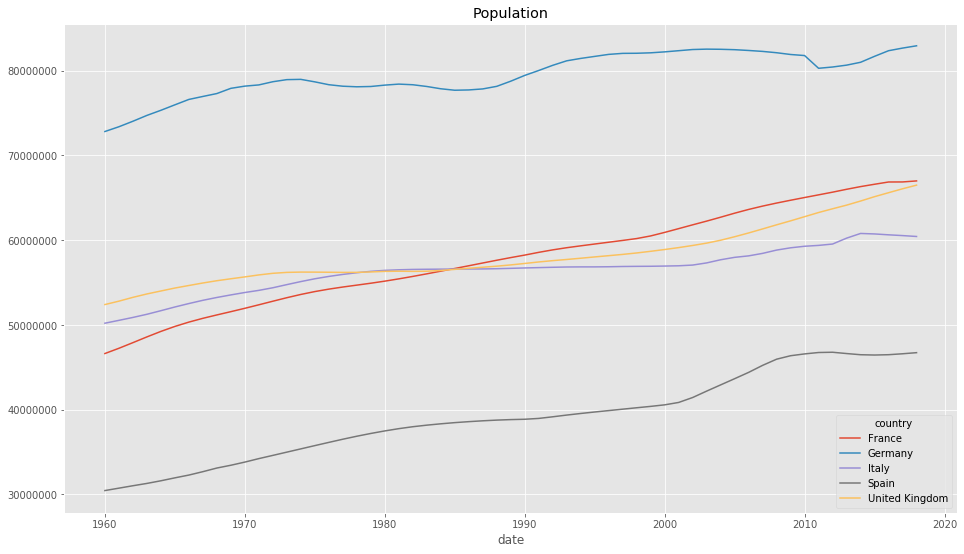

In [29]:
df_pivot.plot(figsize=(16, 9), title='Population');

# Show y-axis in 'plain' format instead of 'scientific'
plt.ticklabel_format(style='plain', axis='y')